Found pointmap1 files: ['pseudo_gt_data/pointmap1/fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722157_2840648400_fl_rgb_1570722163_2325205760.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722158_4732192720_fl_rgb_1570722164_4221705760.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722159_6632197360_fl_rgb_1570722165_6115748720.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722160_8531107920_fl_rgb_1570722166_8006145200.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722162_426972240_fl_rgb_1570722167_9902496800.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722163_2325205760_fl_rgb_1570722169_1799668400.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722164_4221705760_fl_rgb_1570722170_3693278400.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722165_6115748720_fl_rgb_1570722171_5588296560.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722166_8006145200_fl_rgb_1570722172_7487767600.npy', 'pseudo_gt_data/pointmap1/fl_rgb_1570722167_9902496800_fl_rgb_1570722173_939286

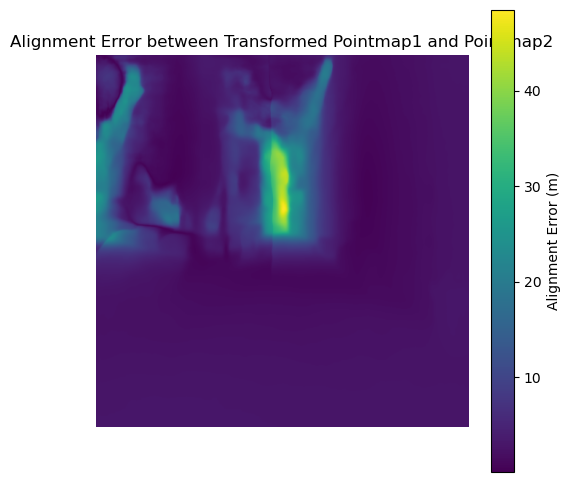

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing pseudo-gt data
base_dir = 'pseudo_gt_data'

# List all files in the pointmap1 directory (assumes files are named consistently, e.g. "img1_img2.npy")
pointmap1_files = sorted(glob.glob(os.path.join(base_dir, 'pointmap1', '*.npy')))
print("Found pointmap1 files:", pointmap1_files)

# Choose one pair for demonstration (you can loop over all pairs)
pair_file = pointmap1_files[0]
base_name = os.path.splitext(os.path.basename(pair_file))[0]
print("Using pair:", base_name)

# Load corresponding files
pointmap1 = np.load(os.path.join(base_dir, 'pointmap1', f"{base_name}.npy"))
pointmap2 = np.load(os.path.join(base_dir, 'pointmap2', f"{base_name}.npy"))
intrinsics = np.load(os.path.join(base_dir, 'intrinsics', f"{base_name}.npy"))
pose = np.load(os.path.join(base_dir, 'poses', f"{base_name}.npy"))

# Define a function to compute alignment error:
def compute_alignment_error(pm1, pm2, T):
    """
    Transform pm1 using T and compute the per-point Euclidean error relative to pm2.
    Both pm1 and pm2 are assumed to have shape [H, W, 3].
    T is a 4x4 transformation matrix.
    """
    H, W, _ = pm1.shape
    # Flatten the pointmaps: shape [3, N]
    X1 = pm1.reshape(-1, 3).T  
    X2 = pm2.reshape(-1, 3).T  
    
    # Convert X1 to homogeneous coordinates: shape [4, N]
    ones = np.ones((1, X1.shape[1]))
    X1_hom = np.vstack([X1, ones])
    
    # Transform X1 into view2's coordinate system using T
    X1_trans_hom = T @ X1_hom  
    X1_trans = X1_trans_hom[:3, :]
    
    # Compute Euclidean distances per point
    errors = np.linalg.norm(X1_trans - X2, axis=0)
    mean_error = np.mean(errors)
    error_map = errors.reshape(H, W)
    return mean_error, error_map

mean_err, err_map = compute_alignment_error(pointmap1, pointmap2, pose)
print("Mean alignment error (meters):", mean_err)

# Visualize the error map as a heatmap
plt.figure(figsize=(6,6))
plt.imshow(err_map, cmap='viridis')
plt.colorbar(label='Alignment Error (m)')
plt.title('Alignment Error between Transformed Pointmap1 and Pointmap2')
plt.axis('off')
plt.show()


Found 20609 files in pointmap1 and 20609 files in pointmap2.
Loaded pointmap1 shape: (512, 512, 3)
Loaded pointmap2 shape: (512, 512, 3)
Mean alignment error (meters): 11.842445999498201


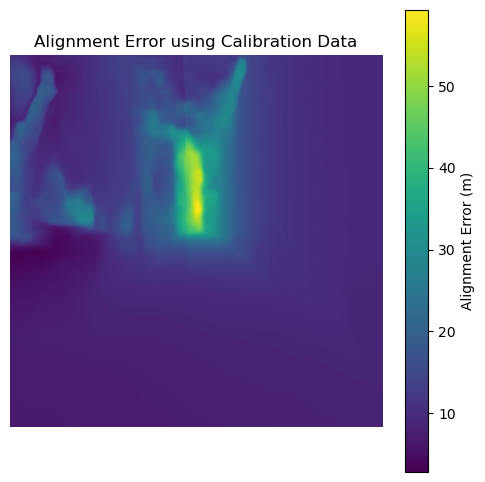

In [7]:
import numpy as np
import matplotlib.pyplot as plt
calib_data = {
    "translation": [-0.061495404690504074, 0.0009927010396495461, 0.013710226863622665],
    "rotation": [
        [0.9999530911445618, -0.0031489229295402765, 0.009157964959740639],
        [0.0029065434355288744, 0.9996482729911804, 0.026359722018241882],
        [-0.009237751364707947, -0.026331868022680283, 0.9996105432510376]
    ],
    "intrinsic": [465.2095642089844, 461.648681640625, 315.7236633300781, 249.76126098632812]
}
import os
import glob
import numpy as np

# Define the base directory where your pseudo-gt data is stored.
base_dir = "pseudo_gt_data"

# Define directories for pointmap1 and pointmap2.
pm1_dir = os.path.join(base_dir, "pointmap1")
pm2_dir = os.path.join(base_dir, "pointmap2")

# List all .npy files in each directory.
pm1_files = sorted(glob.glob(os.path.join(pm1_dir, "*.npy")))
pm2_files = sorted(glob.glob(os.path.join(pm2_dir, "*.npy")))

print("Found {} files in pointmap1 and {} files in pointmap2.".format(len(pm1_files), len(pm2_files)))

# Load a specific pair based on matching file names.
if pm1_files and pm2_files:
    # Here we assume the first file in pointmap1 corresponds to the first file in pointmap2.
    # Alternatively, if the naming convention is more complex, you can match using the base name.
    pm1_file = pm1_files[0]
    base_name = os.path.splitext(os.path.basename(pm1_file))[0]
    
    # Construct the matching file path in pointmap2.
    pm2_file = os.path.join(pm2_dir, f"{base_name}.npy")
    
    if os.path.exists(pm2_file):
        pointmap1_np = np.load(pm1_file)
        pointmap2_np = np.load(pm2_file)
        print("Loaded pointmap1 shape:", pointmap1_np.shape)
        print("Loaded pointmap2 shape:", pointmap2_np.shape)
    else:
        print("No matching file for", base_name, "found in pointmap2")
else:
    print("No pointmap files found!")



R = np.array(calib_data["rotation"])
t = np.array(calib_data["translation"])
extrinsic = np.eye(4)
extrinsic[:3, :3] = R
extrinsic[:3, 3] = t
fx, fy, cx, cy = calib_data["intrinsic"]
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]])

def compute_alignment_error(pm1, pm2, T):
    H, W, _ = pm1.shape
    X1 = pm1.reshape(-1, 3).T
    X2 = pm2.reshape(-1, 3).T
    ones = np.ones((1, X1.shape[1]))
    X1_hom = np.vstack([X1, ones])
    X1_trans_hom = T @ X1_hom
    X1_trans = X1_trans_hom[:3, :]
    errors = np.linalg.norm(X1_trans - X2, axis=0)
    mean_error = np.mean(errors)
    error_map = errors.reshape(H, W)
    return mean_error, error_map

mean_err, err_map = compute_alignment_error(pointmap1_np, pointmap2_np, extrinsic)
print("Mean alignment error (meters):", mean_err)

plt.figure(figsize=(6,6))
plt.imshow(err_map, cmap='viridis')
plt.colorbar(label='Alignment Error (m)')
plt.title('Alignment Error using Calibration Data')
plt.axis('off')
plt.show()


Intrinsics:
 [[465.20956421   0.         315.72366333]
 [  0.         461.64868164 249.76126099]
 [  0.           0.           1.        ]]
Relative Pose:
 [[ 0.55762746  0.0782717  -0.82639286 -5.39575618]
 [ 0.09862006  0.98224664  0.15957952 -1.59287788]
 [ 0.82421217 -0.17048483  0.54000854  8.62869813]
 [ 0.          0.          0.          1.        ]]


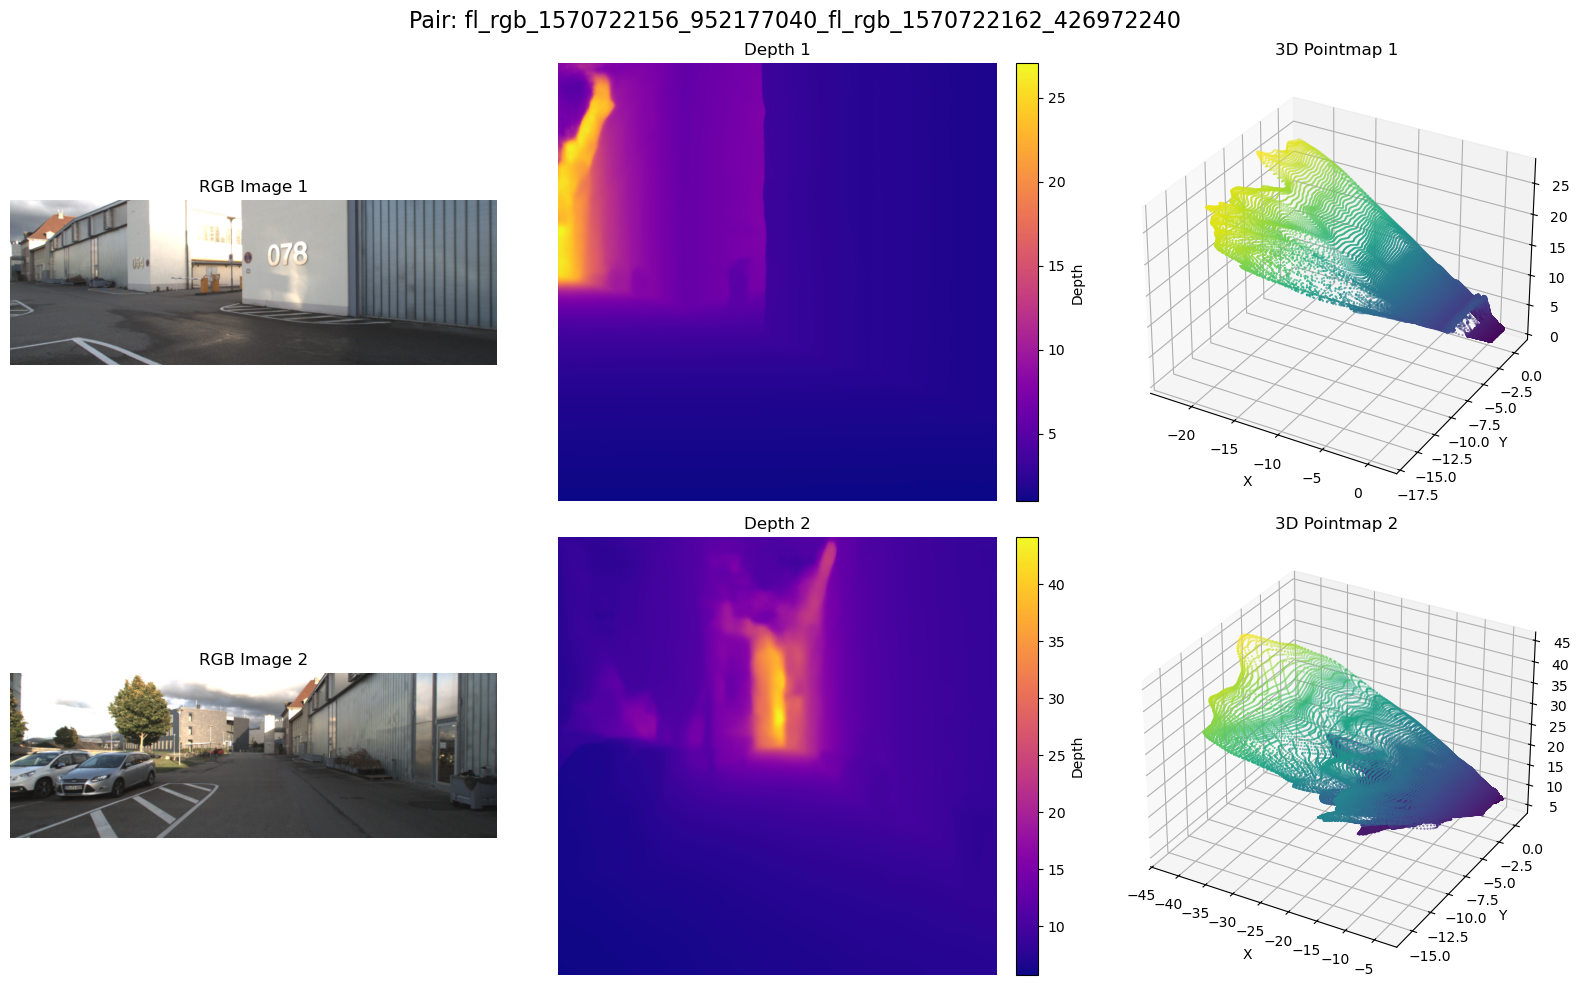

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

def load_rgb_image(path):
    """Load an RGB image with OpenCV, convert BGR->RGB."""
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"Could not read image at: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def load_depth(path):
    """Load depth from a .npy file (shape [H, W]) or from the Z channel of a pointmap."""
    depth = np.load(path)
    return depth

def load_pointmap(path):
    """Load a pointmap (shape [H, W, 3]) from .npy."""
    pm = np.load(path)
    return pm

def plot_point_cloud(ax, pointmap, color_mode='depth', point_size=1):
    """
    Scatter plot of a 3D pointmap in the given Axes3D (ax).
    color_mode can be 'depth' to color by Z or 'none' for single color.
    """
    H, W, _ = pointmap.shape
    points = pointmap.reshape(-1, 3)
    valid = np.isfinite(points).all(axis=1) & (points[:, 2] > 0)
    points = points[valid]
    
    # Color points by depth
    depths = points[:, 2]
    if color_mode == 'depth':
        cmin, cmax = depths.min(), depths.max()
        denom = (cmax - cmin) if (cmax > cmin) else 1.0
        colors = cm.viridis((depths - cmin) / denom)
    else:
        colors = 'blue'
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2],
               s=point_size, c=colors, marker='.')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

def visualize_pair(
    rgb1_path, depth1_path, pm1_path,
    rgb2_path, depth2_path, pm2_path,
    intrinsics_path, pose_path,
    title="Pair Visualization"
):
    """
    Visualize a pair of images (RGB1 & RGB2), their depths, and their 3D pointmaps.
    Also display intrinsics and relative pose in the console or an optional subplot.
    """

    # Load data for view1
    rgb1 = load_rgb_image(rgb1_path)
    depth1 = load_depth(depth1_path)
    pm1 = load_pointmap(pm1_path)

    # Load data for view2
    rgb2 = load_rgb_image(rgb2_path)
    depth2 = load_depth(depth2_path)
    pm2 = load_pointmap(pm2_path)

    # Load intrinsics & pose
    intrinsics = np.load(intrinsics_path)  # shape [3,3]
    pose = np.load(pose_path)             # shape [4,4]

    # Print them to console
    print("Intrinsics:\n", intrinsics)
    print("Relative Pose:\n", pose)

    # Create figure
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle(title, fontsize=16)

    # Subplot 1: RGB Image 1
    ax1 = fig.add_subplot(2, 3, 1)
    ax1.imshow(rgb1)
    ax1.set_title("RGB Image 1")
    ax1.axis("off")

    # Subplot 2: Depth 1
    ax2 = fig.add_subplot(2, 3, 2)
    im2 = ax2.imshow(depth1, cmap="plasma")
    ax2.set_title("Depth 1")
    ax2.axis("off")
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04, label="Depth")

    # Subplot 3: Point Cloud 1
    ax3 = fig.add_subplot(2, 3, 3, projection='3d')
    plot_point_cloud(ax3, pm1, color_mode='depth')
    ax3.set_title("3D Pointmap 1")

    # Subplot 4: RGB Image 2
    ax4 = fig.add_subplot(2, 3, 4)
    ax4.imshow(rgb2)
    ax4.set_title("RGB Image 2")
    ax4.axis("off")

    # Subplot 5: Depth 2
    ax5 = fig.add_subplot(2, 3, 5)
    im5 = ax5.imshow(depth2, cmap="plasma")
    ax5.set_title("Depth 2")
    ax5.axis("off")
    fig.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04, label="Depth")

    # Subplot 6: Point Cloud 2
    ax6 = fig.add_subplot(2, 3, 6, projection='3d')
    plot_point_cloud(ax6, pm2, color_mode='depth')
    ax6.set_title("3D Pointmap 2")

    plt.tight_layout()
    plt.show()


# Example usage:
if __name__ == "__main__":
    # Just an example. Adjust these paths to your actual files:
    pair_name = "fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240"
    pseudo_gt_dir = "pseudo_gt_data"

    # For view1, base_name1 is "fl_rgb_1570722156_952177040"
    # For view2, base_name2 is "fl_rgb_1570722162_426972240"
    base_name1, base_name2 = pair_name.split("_fl_rgb_", 1)
    base_name2 = "fl_rgb_" + base_name2  # reconstruct second half

    # Paths
    rgb1_path = "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb/fl_rgb_1570722156_952177040.png"
    depth1_path = os.path.join(pseudo_gt_dir, "depth1", f"{base_name1}.npy")
    pm1_path = os.path.join(pseudo_gt_dir, "pointmap1", f"{pair_name}.npy")

    rgb2_path = "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb/fl_rgb_1570722162_426972240.png"
    depth2_path = os.path.join(pseudo_gt_dir, "depth2", f"{base_name2}.npy")
    pm2_path = os.path.join(pseudo_gt_dir, "pointmap2", f"{pair_name}.npy")

    intrinsics_path = os.path.join(pseudo_gt_dir, "intrinsics", f"{pair_name}.npy")
    pose_path = os.path.join(pseudo_gt_dir, "poses", f"{pair_name}.npy")

    # Visualize
    visualize_pair(rgb1_path, depth1_path, pm1_path,
                   rgb2_path, depth2_path, pm2_path,
                   intrinsics_path, pose_path,
                   title=f"Pair: {pair_name}")


In [13]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

def load_rgb_image(path):
    """Load an RGB image with OpenCV, convert BGR->RGB."""
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"Could not read image at: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def load_depth(path):
    """Load depth from a .npy file (shape [H, W])."""
    depth = np.load(path)
    return depth

def load_pointmap(path):
    """Load a pointmap (shape [H, W, 3]) from .npy."""
    pm = np.load(path)
    return pm

def plot_point_cloud(ax, pointmap, color_mode='depth', point_size=1):
    """
    Scatter plot of a 3D pointmap in the given Axes3D (ax).
    color_mode can be 'depth' to color by Z or 'none' for single color.
    """
    H, W, _ = pointmap.shape
    points = pointmap.reshape(-1, 3)
    valid = np.isfinite(points).all(axis=1) & (points[:, 2] > 0)
    points = points[valid]
    
    # Color points by depth
    depths = points[:, 2]
    if depths.size == 0:
        # If no valid points, just skip
        return
    if color_mode == 'depth':
        cmin, cmax = depths.min(), depths.max()
        denom = (cmax - cmin) if (cmax > cmin) else 1.0
        colors = cm.viridis((depths - cmin) / denom)
    else:
        colors = 'blue'
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2],
               s=point_size, c=colors, marker='.')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

def visualize_pair(
    rgb1_path, depth1_path, pm1_path,
    rgb2_path, depth2_path, pm2_path,
    intrinsics_path, pose_path,
    out_dir="visualized_pairs",
    pair_name="unknown_pair",
    title="Pair Visualization"
):
    """
    Visualize a pair of images (RGB1 & RGB2), their depths, and their 3D pointmaps.
    """

    # Load data for view1
    rgb1 = load_rgb_image(rgb1_path)
    depth1 = load_depth(depth1_path)
    pm1 = load_pointmap(pm1_path)

    # Load data for view2
    rgb2 = load_rgb_image(rgb2_path)
    depth2 = load_depth(depth2_path)
    pm2 = load_pointmap(pm2_path)

    # Load intrinsics & pose
    if os.path.exists(intrinsics_path):
        intrinsics = np.load(intrinsics_path)
    else:
        intrinsics = None
    
    if os.path.exists(pose_path):
        pose = np.load(pose_path)
    else:
        pose = None

    # Print them to console
    print(f"\n=== Visualizing pair: {pair_name} ===")
    print("RGB1:", rgb1_path)
    print("Depth1:", depth1_path, depth1.shape)
    print("Pointmap1:", pm1_path, pm1.shape)
    print("RGB2:", rgb2_path)
    print("Depth2:", depth2_path, depth2.shape)
    print("Pointmap2:", pm2_path, pm2.shape)
    print("Intrinsics:", intrinsics_path, "(exists? ", os.path.exists(intrinsics_path), ")")
    print("Pose:", pose_path, "(exists? ", os.path.exists(pose_path), ")")

    # Create figure
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle(title, fontsize=16)

    # Subplot 1: RGB Image 1
    ax1 = fig.add_subplot(2, 3, 1)
    ax1.imshow(rgb1)
    ax1.set_title("RGB Image 1")
    ax1.axis("off")

    # Subplot 2: Depth 1
    ax2 = fig.add_subplot(2, 3, 2)
    im2 = ax2.imshow(depth1, cmap="plasma")
    ax2.set_title("Depth 1")
    ax2.axis("off")
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04, label="Depth")

    # Subplot 3: Point Cloud 1
    ax3 = fig.add_subplot(2, 3, 3, projection='3d')
    plot_point_cloud(ax3, pm1, color_mode='depth')
    ax3.set_title("3D Pointmap 1")

    # Subplot 4: RGB Image 2
    ax4 = fig.add_subplot(2, 3, 4)
    ax4.imshow(rgb2)
    ax4.set_title("RGB Image 2")
    ax4.axis("off")

    # Subplot 5: Depth 2
    ax5 = fig.add_subplot(2, 3, 5)
    im5 = ax5.imshow(depth2, cmap="plasma")
    ax5.set_title("Depth 2")
    ax5.axis("off")
    fig.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04, label="Depth")

    # Subplot 6: Point Cloud 2
    ax6 = fig.add_subplot(2, 3, 6, projection='3d')
    plot_point_cloud(ax6, pm2, color_mode='depth')
    ax6.set_title("3D Pointmap 2")

    plt.tight_layout()

    os.makedirs(out_dir, exist_ok=True)
    out_path = os.path.join(out_dir, f"{pair_name}.png")
    plt.savefig(out_path)
    plt.close()
    print(f"Saved figure to: {out_path}")


if __name__ == "__main__":
    pseudo_gt_dir = "pseudo_gt_data"

    # 1) List all files in pointmap1 as the "pair_name"
    pm1_dir = os.path.join(pseudo_gt_dir, "pointmap1")
    pm1_files = sorted(glob.glob(os.path.join(pm1_dir, "*.npy")))
    print("Found", len(pm1_files), "files in pointmap1_dir")

    # 2) Loop over them (you can limit e.g. first 5)
    for pm1_file in pm1_files[:5]:
        pair_name = os.path.splitext(os.path.basename(pm1_file))[0]
        
        # Reconstruct base_name1, base_name2
        # e.g. pair_name = "fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240"
        # Typically splitted by "_fl_rgb_"
        if "_fl_rgb_" not in pair_name:
            print(f"Skipping {pair_name}, doesn't match expected pattern.")
            continue

        base_name1, base_name2 = pair_name.split("_fl_rgb_", 1)
        base_name2 = "fl_rgb_" + base_name2

        # Build the paths
        rgb1_path = os.path.join(
            "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb",
            f"{base_name1}.png"
        )
        depth1_path = os.path.join(pseudo_gt_dir, "depth1", f"{base_name1}.npy")
        pm1_path = os.path.join(pseudo_gt_dir, "pointmap1", f"{pair_name}.npy")

        rgb2_path = os.path.join(
            "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb",
            f"{base_name2}.png"
        )
        depth2_path = os.path.join(pseudo_gt_dir, "depth2", f"{base_name2}.npy")
        pm2_path = os.path.join(pseudo_gt_dir, "pointmap2", f"{pair_name}.npy")

        intrinsics_path = os.path.join(pseudo_gt_dir, "intrinsics", f"{pair_name}.npy")
        pose_path = os.path.join(pseudo_gt_dir, "poses", f"{pair_name}.npy")

        # 3) Check that the files exist
        if not (os.path.exists(rgb1_path) and os.path.exists(rgb2_path)):
            print(f"Missing RGB images for {pair_name}. Skipping.")
            continue
        if not (os.path.exists(depth1_path) and os.path.exists(depth2_path)):
            print(f"Missing depth for {pair_name}. Skipping.")
            continue
        if not (os.path.exists(pm1_path) and os.path.exists(pm2_path)):
            print(f"Missing pointmaps for {pair_name}. Skipping.")
            continue

        # 4) Visualize
        visualize_pair(
            rgb1_path, depth1_path, pm1_path,
            rgb2_path, depth2_path, pm2_path,
            intrinsics_path, pose_path,
            out_dir="visualized_pairs",
            pair_name=pair_name,
            title=f"Pair: {pair_name}"
        )


Found 20609 files in pointmap1_dir

=== Visualizing pair: fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240 ===
RGB1: /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb/fl_rgb_1570722156_952177040.png
Depth1: pseudo_gt_data/depth1/fl_rgb_1570722156_952177040.npy (512, 512)
Pointmap1: pseudo_gt_data/pointmap1/fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240.npy (512, 512, 3)
RGB2: /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb/fl_rgb_1570722162_426972240.png
Depth2: pseudo_gt_data/depth2/fl_rgb_1570722162_426972240.npy (512, 512)
Pointmap2: pseudo_gt_data/pointmap2/fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240.npy (512, 512, 3)
Intrinsics: pseudo_gt_data/intrinsics/fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240.npy (exists?  True )
Pose: pseudo_gt_data/poses/fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240.npy (exists?  True )
Saved figure to: visualized_pairs/fl_rgb_1570722156_952177040_fl_rgb_